## mixer calibration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

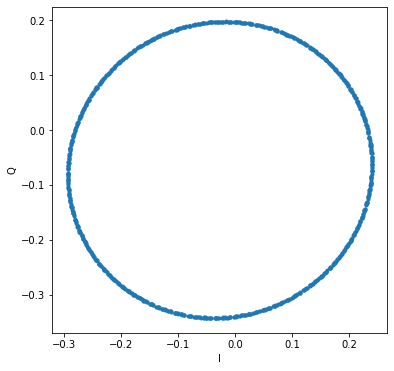

In [3]:
path = '../data/raw/mix_cal/mixer1/'
file_name = 'mix_cal_0'
file = path + file_name + '.h5'

import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

#big_plot_from_file(file, config['ref'][0], config['step'])
I, Q = get_hdf5(file)
plt.figure(figsize=(6,6))
plt.scatter(I[0], Q[0], marker='.')
plt.xlabel('I')
plt.ylabel('Q')
#plt.savefig(path + file_name + '.png', dpi=200, facecolor='white')
plt.show()

center: -0.027, -0.072
width: 0.263
height: 0.273
phi: -0.611


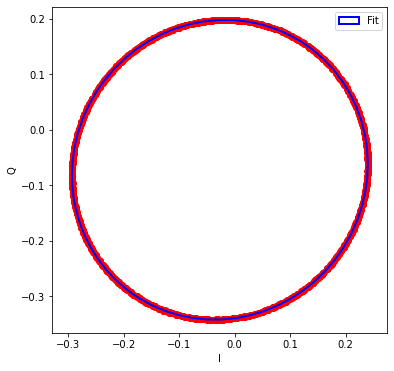

In [4]:
center, width, height, phi = ellipse_fit(I[0], Q[0], plot= True)
print(f'center: {center[0]:.3f}, {center[1]:.3f}')
print(f'width: {width:.3f}')
print(f'height: {height:.3f}')
print(f'phi: {phi:.3f}')

## resonances visualization
4 resonances have been found so far: 4.34, 4.37, 5.63134, 5.8627
The last two are used for the acquisition

In [20]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

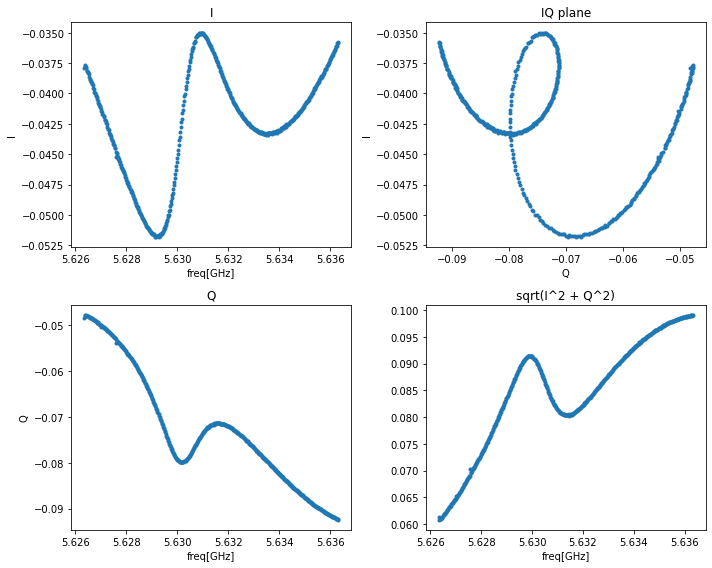

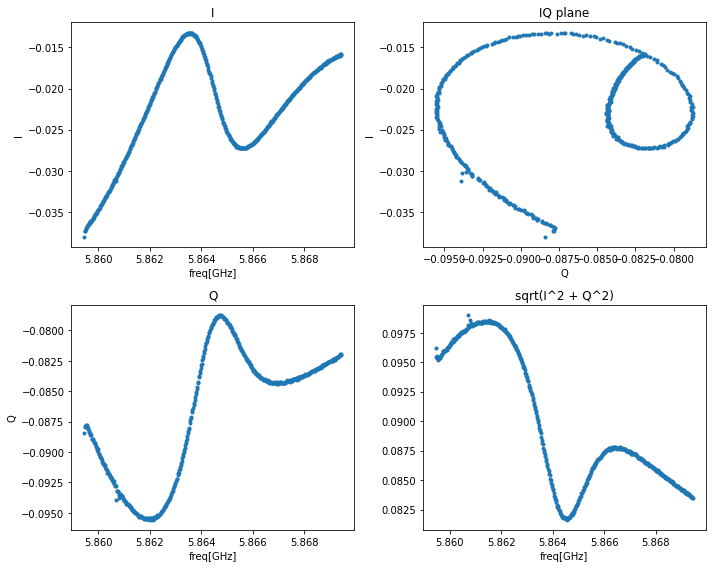

In [43]:
path = '../data/raw/cal_acq/'
file_name = 'scan_res_1'
file = path + file_name + '.h5'

import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

#big_plot_from_file(file, config['ref'][0], config['step'])
I1, Q1, I2, Q2 = get_hdf5_2(file)
big_plot_from_array(I1, Q1, config['ref'][0], config['step'])#, begin=900, end=1100)
big_plot_from_array(I2, Q2, config['ref'][1], config['step'])#, begin=1000, end=1200)

Point found during the falling at position 268 with a frequency of 5.86482.


268

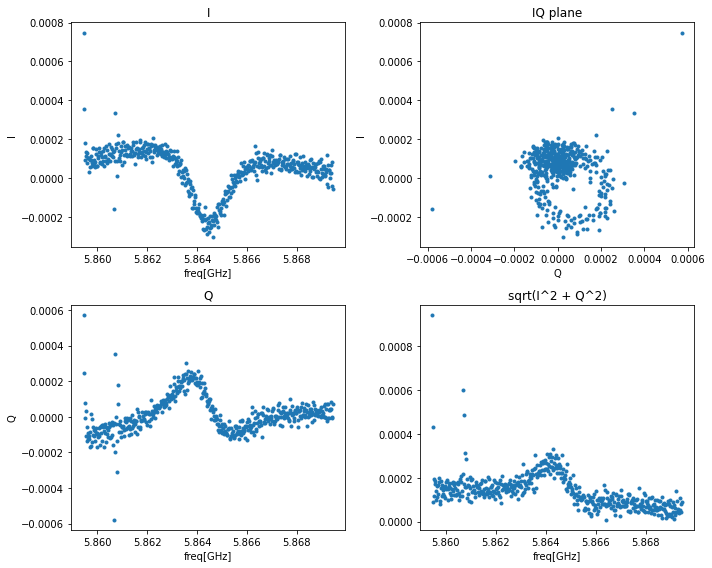

In [62]:
big_plot_from_array(np.gradient(np.array(I2)),np.gradient(np.array(Q2)), config['ref'][1], config['step'])#, begin=900, end=950)
length = check_length(I2, Q2)
x = np.linspace(config['ref'][1] - config['window']*config['step'], config['ref'][1] + (config['window'] - 1)*config['step'], config['window']*2)
der_IQ(x, I2, Q2, begin = 200, end = 300)

## edge acquisition

In [14]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
import os
path = '../data/raw/edge_acq/'
print(os.listdir(path))

['config_acq_060522_174423.json', 'acq_060522_174423.h5', 'acq_060522_180656.h5', 'config_acq_060522_182134.json', 'noise_060522_183913.h5', 'config_noise_060522_183913.json', 'acq_060522_182134.h5', 'acq_060522_180040.h5', 'config_acq_060522_180040.json', 'acq_060522_181916.h5', 'config_acq_060522_180656.json', 'config_acq_060522_181916.json']


In [431]:
path = '../data/raw/'
file_name = 'cont_acq_mix'
file = path + file_name + '.h5'

I1, Q1, I2, Q2 = get_hdf5_2(file)

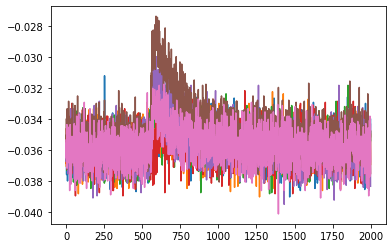

In [435]:
for i in range(0,len(I1), 100):
    plt.plot(Q1[i])

plt.show()

In [ ]:
path = '../data/raw/edge_acq/'
file_name = 'acq_060522_180656'
file = path + file_name + '.h5'

import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

I1, Q1, I2, Q2 = get_hdf5_2(file)

In [6]:
print('For each channel %d wfm have been taken, each one of length %d.' %(len(I1), len(I1[0])))
print('The sample rate was %d Hz, corresponding to a dt of' %config['sample_rate'], 1/config['sample_rate'], 'seconds.')
print('The frequency set for the first resonator is',  config['freq'][0], 'GHz.')
print('The frequency set for the second resonator is', config['freq'][1], 'GHz.')

For each channel 1000 wfm have been taken, each one of length 2000.
The sample rate was 100000000 Hz, corresponding to a dt of 1e-08 seconds.
The frequency set for the first resonator is 5.63124 GHz.
The frequency set for the second resonator is 5.86436 GHz.


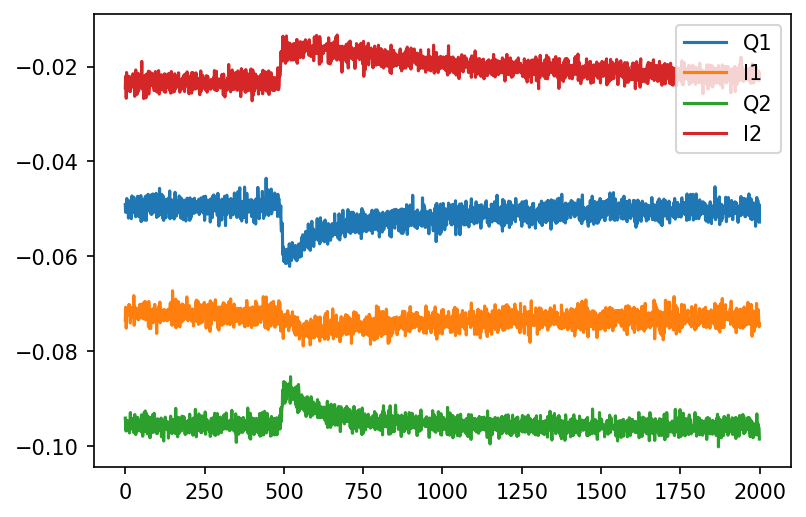

In [8]:
# plot some data
nn=678
plt.figure(dpi=150)
plt.plot(Q1[nn],'-', label='Q1')
plt.plot(I1[nn],'-', label='I1')
plt.plot(Q2[nn],'-', label='Q2')
plt.plot(I2[nn],'-', label='I2')
plt.legend()
plt.show()
#'o-'

## continuos acquisition

In [1]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

In [166]:
path = '/mnt/c/Users/Utente/Downloads/drive-download-20220520T203230Z-001/' 
import os
os.listdir(path)

['config_cont_acq_170522_193308.json',
 'config_cont_acq_170522_193634.json',
 'config_cont_acq_170522_201626.json',
 'config_cont_acq_170522_201853.json',
 'config_cont_acq_170522_202023.json',
 'config_cont_acq_170522_204209.json',
 'config_cont_acq_170522_210452.json',
 'config_cont_acq_170522_221629.json',
 'config_cont_acq_170522_221640.json',
 'config_cont_acq_170522_221650.json',
 'config_cont_acq_170522_221701.json',
 'config_cont_acq_170522_221936.json',
 'config_cont_acq_170522_221946.json',
 'config_cont_acq_170522_221957.json',
 'config_cont_acq_170522_222008.json',
 'config_cont_acq_170522_222235.json',
 'config_cont_acq_170522_222246.json',
 'config_cont_acq_170522_222257.json',
 'config_cont_acq_170522_222307.json',
 'config_cont_acq_170522_222535.json',
 'config_cont_acq_170522_222546.json',
 'config_cont_acq_170522_222557.json',
 'config_cont_acq_170522_222608.json',
 'config_cont_acq_170522_222835.json',
 'config_cont_acq_170522_222846.json',
 'config_cont_acq_170522_

In [2]:
path = '/mnt/c/Users/Utente/Downloads/' #'../data/raw/cont_acq/'
file_name = 'cont_acq_180522_010509'
file = path + file_name + '.h5'

"""import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)"""

I1, Q1, I2, Q2 = get_hdf5_2(file)

In [254]:
np.array(I1).shape

(1000000,)

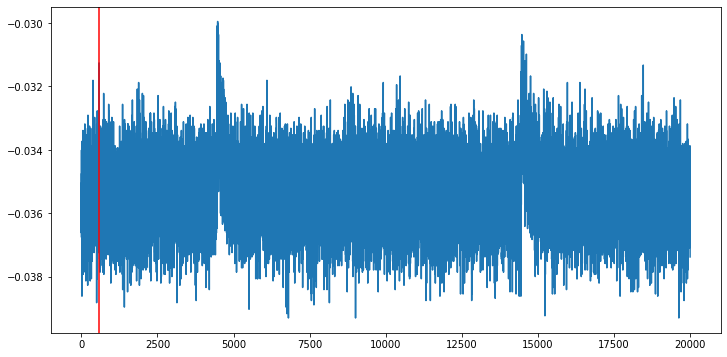

In [3]:
start = 20000#3400+10000*99# 14286*1
y = Q1[start:start + 20000]
plt.figure(figsize=(12,6))
plt.plot(y)
plt.axvline(570, c='red')
#plt.xlim(2200,2300)
plt.show()

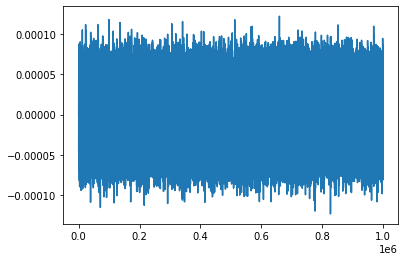

In [243]:
savgol = savgol_filter(Q2, window_length=50, polyorder=4, deriv=1, delta=1, mode='mirror')
plt.plot(savgol)

In [369]:
np.diff(np.nonzero(Q1>-0.0315)[0])

array([ 4999,  1761,   973, 15341,    13,   289, 22773,  7682, 15387,
          75,  7617, 76920, 30781, 53938, 15350, 30721,    72, 23007,
           5, 15350,    20, 23084,  7672,  7691,   110,  7609, 10332,
        4504,   533, 23369, 15745, 14737, 38441,    75, 15329,    23,
       23043,  7695, 15605, 15166, 23079, 15375, 30798, 23052, 15394,
          19, 15360, 15379, 38449,  7725, 17271, 19397,  1839, 15401,
       15332,    12,  7645,    11, 46157, 23097,  7672,  7681,  7692,
       23082,     7, 53863,  7734])

In [194]:
8448+  4078+  1798

14324

The following piece of code should be adjusted every time, it's just to have an idea of the output of segmentation.py 

-0.0612 is deduced from the plot such that only one point for each signal is below it.

In [368]:
nsample = round(config['total_acq_time']/(1/config['sample_rate']*np.diff(np.nonzero(y>-0.0316)[0])[0]))
print('About %d signals have been acquired during this continuos acquisition.' %nsample)

About 21277 signals have been acquired during this continuos acquisition.


In [298]:
I1new, Q1new, I2new, Q2new = [], [], [], []
I1new2, Q1new2, I2new2, Q2new2 = [], [], [], []

In [425]:
#I1new, Q1new, I2new, Q2new = [], [], [], []
#QUESTA
for i in range(0,100):
    start = 3400+10000*i #7290+10000*i#2400 + 14286*i
    I1new2.append(I1[start:start + 2000])
    Q1new2.append(Q1[start:start + 2000])
    I2new2.append(I2[start:start + 2000])
    Q2new2.append(Q2[start:start + 2000])
#t = np.linspace(0, len(I1new)-1, len(I1new))

#storage_hdf5('../data/raw/cont_acq_1.h5', 'i_signal_ch0', I1new, 'q_signal_ch0', Q1new, 'i_signal_ch1', I2new, 'q_signal_ch1', Q2new)

In [430]:
t = np.linspace(0, len(I1new2)-1, len(I1new2))
storage_hdf5('../data/raw/cont_acq_mix.h5', 'i_signal_ch0', I1new2, 'q_signal_ch0', Q1new2, 'i_signal_ch1', I2new2, 'q_signal_ch1', Q2new2, 'timestamp_ch0', t, 'timestamp_ch1', t)

In [399]:
#I1new2, Q1new2, I2new2, Q2new2 = [], [], [], []
for i in range(0,340):
    #start = 240+14286*i #7290+10000*i#2400 + 14286*i
    I1new2.append(I1new[i])
    Q1new2.append(Q1new[i])
    I2new2.append(I2new[i])
    Q2new2.append(Q2new[i])

In [429]:
np.array(Q1new2).shape

(610, 2000)

In [2]:
a=np.array([[1,1],[0,3]])
np.mean(a)

1.25

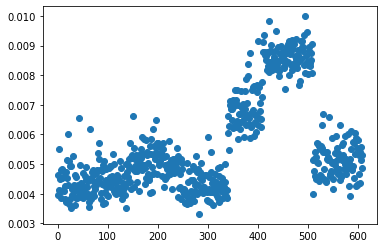

In [9]:
with h5py.File('../data/raw/cont_acq_mix.h5') as hdf:
    yy = np.array(hdf['q_signal_ch0'])

savgol = savgol_filter(yy, window_length=50, polyorder=4, deriv=1, delta=1, mode='mirror')

def MC(sample):
    return np.max(sample)-np.mean(sample[0:200])

mc = []
for sample in yy:
    mc.append(MC(sample))

plt.scatter(np.linspace(0, len(mc)-1, len(mc)), mc)

In [6]:
len(yy)

610

## other plots

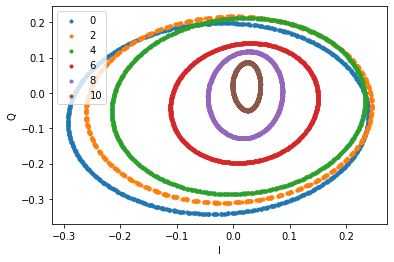

In [68]:
path = '../data/raw/mix_cal/mixer1/'
for i in [0,2,4,6,8,10]:
    file_name = 'mix_cal_' + str(i)
    file = path + file_name + '.h5'
    I, Q = get_hdf5(file)
    #big_plot_from_array(I, Q, config['ref'], config['step'])
    plt.scatter(I[0], Q[0], marker='.', label=str(i))
    plt.xlabel('I')
    plt.ylabel('Q')
plt.legend()
plt.savefig(path+'power.png', dpi=200, facecolor='white')

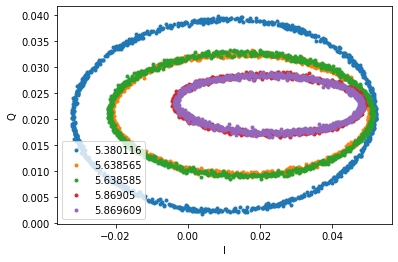

In [19]:
path = '../data/raw/mix_cal/mixer1/'
#[5.345679, 5.380116, 5.638565, 5.869609]
for i in [5.380116, 5.638565, 5.638585, 5.869050, 5.869609]:
    file_name = 'mix_cal_' + str(int(i*1e6))
    file = path + file_name + '.h5'
    I, Q = get_hdf5(file)
    #big_plot_from_array(I, Q, config['ref'], config['step'])
    plt.scatter(I[0], Q[0], marker='.', label=str(i))
    plt.xlabel('I')
    plt.ylabel('Q')
plt.legend()
plt.savefig(path+'frequency1_all.png', dpi=200, facecolor='white')

Text(0, 0.5, 'Q')

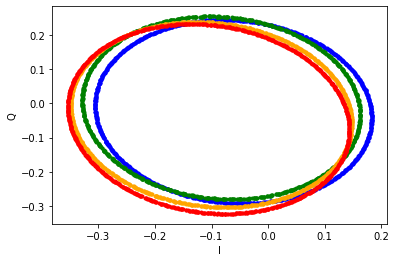

In [214]:
#I, Q = get_hdf5(file)
#big_plot_from_array(I, Q, config['ref'], config['step'])
plt.scatter(I1[0], Q1[0], marker='.', color='b')
plt.scatter(I2[0], Q2[0], marker='.', color='g')
plt.scatter(I3[0], Q3[0], marker='.', color='orange')
plt.scatter(I4[0], Q4[0], marker='.', color='r')
plt.xlabel('I')
plt.ylabel('Q')

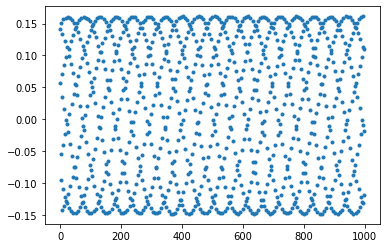

In [247]:
plt.scatter(np.linspace(0,len(Q[0])-1,len(Q[0])),Q[0], marker='.')

## Savgol filter

In [11]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
#upload data
path  = '../data/raw/'
file = 'cont_acq_mix.h5'  #os.listdir(path)

#I1, Q1, t1, I2, Q2, t2 = get_hdf5_time(path + file)
I1, Q1, I2, Q2 = get_hdf5_2(path + file)


In [12]:
np.array(I1).shape

(610, 2000)

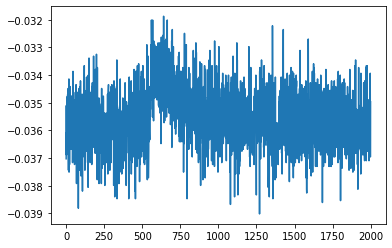

In [16]:
#plot one signal 
plt.plot(Q1[100])
#plt.xlim(1100,1200)

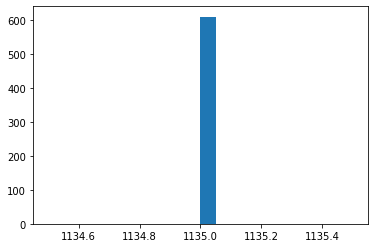

In [14]:
# apply the trigger and plot results 
# a histogram of the signals start indexes 
window_ma = 30
indexes = np.array(derivative_trigger_matrix(Q1, window_ma=window_ma, wl=60, poly=4, polarity=1, vertex=False))
#indexes.sort()
plt.hist(indexes, bins = 20)
#plt.ylim(0,20)
plt.show()
nn = np.argmin(np.array(indexes))
mm = np.argmax(np.array(indexes))

In [15]:
print('The signals with the two most different starts are %d and %d. The starts are %d and %d.' %(nn, mm, indexes[nn], indexes[mm]))

The signals with the two most different starts are 0 and 0. The starts are 1135 and 1135.


573
573
584


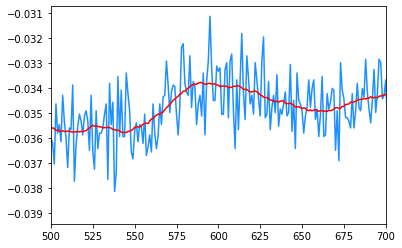

In [24]:
# if a signal has a strange behavior, check here what happened 
ii = 0#mm
weights = np.full((1, window_ma), 1/window_ma)
moving_averages = convolve([Q1[ii]], weights, mode='mirror')

first_derivative = savgol_filter(Q1[ii], window_length=60, polyorder=4, deriv=1, delta=1, mode='mirror')
std = np.std(first_derivative[0:100]) #100 will become a function of length and pos_ref in PXIe
index_min = first_derivative.argmax()
print(index_min)
rise_points = 0

while first_derivative[index_min - rise_points] < -std:
    rise_points += 1

print(index_min - rise_points)
start=index_min - rise_points
a=10
if start < a:
    start = a

if start > len(Q1[ii])-2*a:
    start = len(Q1[ii])-2*a

end = start + 2*a
begin = start - a

derivative_func = savgol_filter(Q1[ii], window_length=90, polyorder=4, deriv=2, delta=1, mode='mirror')

x2 = begin+1+(derivative_func[begin+1:end-1].argmin())
print(x2)        

plt.plot(Q1[ii], color = 'dodgerblue')
plt.plot(savgol_filter(Q1[ii], window_length=90, polyorder=4, deriv=0, delta=1, mode='mirror'), color='r')
plt.xlim(500,700)
plt.show()

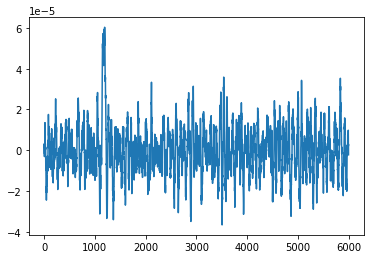

In [121]:
plt.plot(savgol_filter(Q1[ii], window_length=90, polyorder=4, deriv=1, delta=1, mode='mirror'))

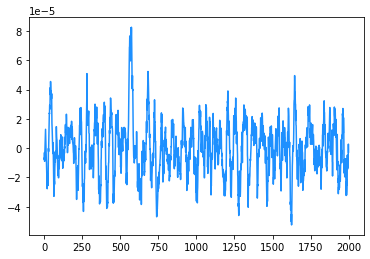

In [22]:
#plt.plot(Q1[ii], color='r')
ii=0
plt.plot(savgol_filter(Q1[ii], window_length=60, polyorder=4, deriv=1, delta=1, mode='mirror'), color='dodgerblue')
#plt.xlim(950,1020)
plt.show()

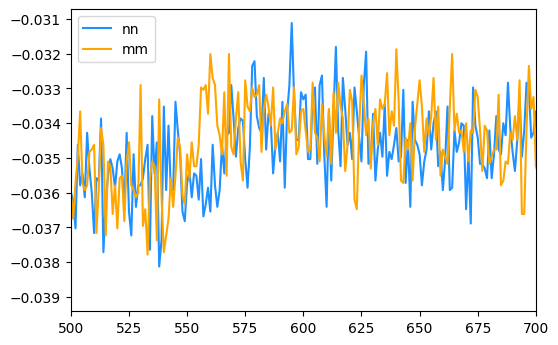

In [19]:
# plot the two most distant signals
plt.figure(dpi=100)
plt.plot(Q1[nn], label = 'nn', color = 'dodgerblue')
plt.plot(Q1[100], label = 'mm', color = 'orange')
"""q=np.zeros(np.shape(Q1[0]))
for i in range(len(Q1)):
    q = q + Q1[i]
plt.plot(q/len(Q1))"""
plt.legend()
plt.xlim(500,700)
plt.show()

In [160]:
# apply savgol to them 
delta = (indexes - indexes.min()).astype(int)
end = (indexes - indexes.max() - 1).astype(int)

new_Q1 = []

#np.where
for i in range(len(Q1)):
    new_Q1.append(Q1[i][delta[i]:end[i]])

(1050.0, 1300.0)

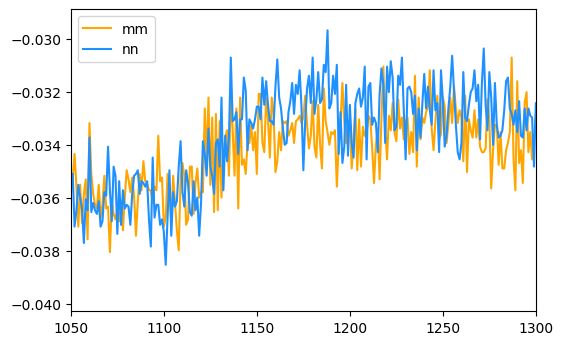

In [162]:
# plot them again and see the magic
plt.figure(dpi=100)
plt.plot(new_Q1[nn], label = 'mm', color = 'orange')
plt.plot(new_Q1[mm], label = 'nn', color = 'dodgerblue')
plt.legend()
plt.xlim(1050,1300)

In [232]:
# if happy with the results, save them. Here or with the dedicated script (savgol_filter.py)
I1, Q1, t1, I2, Q2, t2 = get_hdf5_time(path + file)

# apply savgol filter and derivative trigger to align the wfms
indexes = np.array(derivative_trigger_matrix(Q1, window_ma=window_ma, wl=60, poly=4, polarity=-1)) # choose whether to use I or Q for the savgol filter and choose parameters

#print(indexes)
# code to align the samples
# e.g. take the first entry as a reference and move the other
delta = (indexes - indexes.min()).astype(int)
end = (indexes - indexes.max() - 1).astype(int)

print(len(I1[0][delta[0]:end[0]]))

# at the end it's necessary to cut the samples to have them all of the same length
# - 1 in end needed to avoid Q[i][sth:0] that happened when indexes=indexes.max()
# and returned an empty array
new_I1, new_Q1, new_I2, new_Q2 = [], [], [], []

#np.where
for i in range(len(I1)):
    new_I1.append(I1[i][delta[i]:end[i]])
    new_Q1.append(Q1[i][delta[i]:end[i]])
    new_I2.append(I2[i][delta[i]:end[i]])
    new_Q2.append(Q2[i][delta[i]:end[i]])

# use storage hdf5 from utils to store the new matrices
storage_hdf5(path + 'savgol_' + file, 'i_signal_ch0', new_I1, 'q_signal_ch0', new_Q1, 'timestamp_ch0', t1, 'i_signal_ch1', new_I2, 'q_signal_ch1', new_Q2, 'timestamp_ch1', t2)
print('Done :)')

1977
Done :)


## join signal and noise

In [161]:
path  = '../data/clean/segm_acq/' #'../data/raw/edge_acq/'
file = 'segm_acq_060522_183654.h5' #os.listdir(path)

I1, Q1, t1, I2, Q2, t2 = get_hdf5_time(path + file)

path2  = '../data/raw/edge_acq/'
file2 = 'noise_060522_183913.h5' #os.listdir(path)

NI1, NQ1, Nt1, NI2, NQ2, Nt2 = get_hdf5_time(path2 + file2)

In [164]:
np.array(NI1[:,:len(I1[0])]).shape

(1000, 2000)

In [165]:
a = np.concatenate((np.array(I1), np.array(NI1[:,:len(I1[0])])), axis=0)
b = np.concatenate((np.array(Q1), np.array(NQ1[:,:len(I1[0])])), axis=0)
c = np.concatenate((np.array(I2), np.array(NI2[:,:len(I1[0])])), axis=0)
d = np.concatenate((np.array(Q2), np.array(NQ2[:,:len(I1[0])])), axis=0)
t = np.linspace(0, len(a)-1, len(a))
t.shape
#t1 = np.concatenate((np.array(t1), np.array(Nt1)), axis=0)
#t2 = np.concatenate((np.array(t2), np.array(Nt2)), axis=0)
#t1.shape

(1070,)

In [166]:
path_save = '../data/clean/total/'
storage_hdf5(path_save + 'tot_' + file, 'i_matrix_ch0', a, 'q_matrix_ch0', b, 'i_matrix_ch1', c, 'q_matrix_ch1', d, 'timestamp_ch0', t1, 'timestamp_ch1', t2)

In [47]:
#I1, Q1, I2, Q2 = get_hdf5_2('/home/aperego/Documents/QTLab2122/SingleIRsource/data/clean/SINGLEPH_060522_180656.h5')

name = '/home/aperego/Documents/QTLab2122/SingleIRsource/data/clean/SINGLEPH_060522_180656.watson'
with h5py.File(name, 'r') as hdf:
        I1 = np.array(hdf['0/data'])

In [48]:
I1.shape

(1000, 2000)

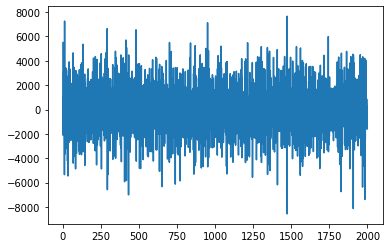

In [49]:
plt.plot(I1[0])

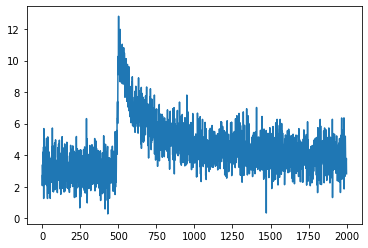

In [50]:
range = 10
ev = np.cumsum(I1[0], dtype='int32')*range/(2**14)
plt.plot(ev)

In [43]:
ev_adc = (ev*2**12)

In [44]:
ev_diff = np.append(ev_adc[0], np.diff(ev_adc)).astype('int16')

In [45]:
ev_diff

array([13737, -5261,  2580, ...,   284,   780, -3973], dtype=int16)

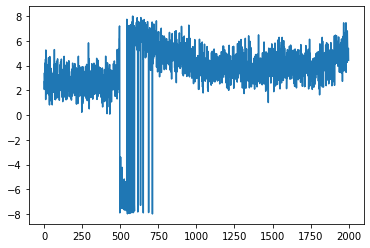

In [46]:
#plt.plot(ev_diff)
ev2 = np.cumsum(ev_diff, dtype='int16')/(2**12)
plt.plot(ev2)

In [11]:
2/(2**14)

0.0001220703125

In [12]:
print(np.cumsum(I1[0])*2/(2**14))

[3.35375977 2.06933594 2.69921875 ... 5.20031738 5.39086914 4.42089844]


In [16]:
2**15

32768

In [54]:
len(I1[0][0:1978])

1978

In [60]:
name = '/home/aperego/Documents/QTLab2122/SingleIRsource/data/clean/total/old_tot_savgol_acq_060522_180656.h5'

with h5py.File(name, 'r') as hdf:
    I1 = np.array(hdf['i_matrix_ch0'])
    Q1 = np.array(hdf['q_matrix_ch0'])
    I2 = np.array(hdf['i_matrix_ch1'])
    Q2 = np.array(hdf['q_matrix_ch1'])
    t1 = np.array(hdf['timestamp_ch0'])
    t2 = np.array(hdf['timestamp_ch1'])

with h5py.File('/home/aperego/Documents/QTLab2122/SingleIRsource/data/clean/total/tot_savgol_acq_060522_180656.h5', 'w') as hdf:
    hdf.create_dataset('i_signal_ch0', data=I1, compression='gzip', compression_opts=9)
    hdf.create_dataset('q_signal_ch0', data=Q1, compression='gzip', compression_opts=9)
    hdf.create_dataset('i_signal_ch1', data=I2, compression='gzip', compression_opts=9)
    hdf.create_dataset('q_signal_ch1', data=Q2, compression='gzip', compression_opts=9)
    hdf.create_dataset('timestamp_ch0', data=t1, compression='gzip', compression_opts=9)
    hdf.create_dataset('timestamp_ch1', data=t2, compression='gzip', compression_opts=9)